In [79]:
!pip install seaborn

In [80]:
!pip install flask


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.colors as pc

In [82]:
# Read the Vestiaire dataset into a dataframe
vestiaire_df = pd.read_csv('C:/Users\sheve/Project-1/datasets/vestiaire_smaller.csv')


# Display the Head of the Data Frame
print(f"This data frame contains {len(vestiaire_df)} rows.")
vestiaire_df.head(3)



This data frame contains 13736 rows.


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,25775970,Germany,3,14
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,NaN,2709130,Italy,172,6
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,NaN,6048767,Germany,5,15


In [83]:
# Display the Tail of the Data Frame
vestiaire_df.tail(3)


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,NaN,3180346,Italy,11,1
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,NaN,19750106,Italy,62,184
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,NaN,5992355,Estonia,1,1


In [84]:
# Examine the rows and columns count
vestiaire_df.shape

(13736, 20)

# Data Cleaning

In [85]:
vestiaire_clean = vestiaire_df.copy()

In [86]:
vestiaire_clean.columns

Index(['product_id', 'product_type', 'product_name', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_id', 'seller_country', 'seller_products_sold',
       'seller_num_products_listed'],
      dtype='object')

In [87]:
vestiaire_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  13736 non-null  int64  
 1   product_type                13736 non-null  object 
 2   product_name                13736 non-null  object 
 3   product_gender_target       13736 non-null  object 
 4   product_category            13727 non-null  object 
 5   product_season              13736 non-null  object 
 6   product_condition           13736 non-null  object 
 7   product_like_count          13736 non-null  int64  
 8   sold                        13736 non-null  bool   
 9   brand_name                  13736 non-null  object 
 10  product_material            13736 non-null  object 
 11  product_color               13736 non-null  object 
 12  price_usd                   13736 non-null  float64
 13  seller_price                137

In [88]:
vestiaire_clean.drop(columns=['buyers_fees'], inplace=True)

In [89]:
(vestiaire_clean.isna().mean() * 100).sum()

0.06552125800815375

In [90]:
vestiaire_clean.isna().mean() * 100

product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
product_gender_target         0.000000
product_category              0.065521
product_season                0.000000
product_condition             0.000000
product_like_count            0.000000
sold                          0.000000
brand_name                    0.000000
product_material              0.000000
product_color                 0.000000
price_usd                     0.000000
seller_price                  0.000000
seller_earning                0.000000
seller_id                     0.000000
seller_country                0.000000
seller_products_sold          0.000000
seller_num_products_listed    0.000000
dtype: float64

In [91]:
vestiaire_clean = vestiaire_clean.dropna(subset=['product_category'])

In [92]:
vestiaire_clean.isna().mean() * 100

product_id                    0.0
product_type                  0.0
product_name                  0.0
product_gender_target         0.0
product_category              0.0
product_season                0.0
product_condition             0.0
product_like_count            0.0
sold                          0.0
brand_name                    0.0
product_material              0.0
product_color                 0.0
price_usd                     0.0
seller_price                  0.0
seller_earning                0.0
seller_id                     0.0
seller_country                0.0
seller_products_sold          0.0
seller_num_products_listed    0.0
dtype: float64

# Exploratory Data Analysis

In [93]:
gender_count = vestiaire_clean['product_gender_target'].value_counts()

fig_gender = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)
fig_gender.show()

In [94]:
# Get the HTML string for the Plotly graph
plotly_gender_html = fig_gender.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_gender_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_gender_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_gender_graph.html


In [95]:
# Aggregate the data to get the count of sellers per country
seller_counts = vestiaire_clean['seller_country'].value_counts().reset_index()
seller_counts.columns = ['country', 'seller_count']

# Create a list of Countries with Sellers
country_list = seller_counts['country'].tolist()
print(country_list)
print(len(country_list))


['Italy', 'France', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Poland', 'Romania', 'Sweden', 'Greece', 'Bulgaria', 'Netherlands', 'Belgium', 'Austria', 'Portugal', 'Australia', 'Hong Kong', 'Ireland', 'Denmark', 'Lithuania', 'Switzerland', 'Finland', 'Latvia', 'Croatia', 'Czech Republic', 'Hungary', 'Monaco', 'Cyprus', 'Slovakia', 'Canada', 'Luxembourg', 'Singapore', 'Estonia', 'Slovenia', 'Japan', 'United Arab Emirates', 'Malaysia', 'South Korea', 'Philippines', 'Malta', 'Turkey', 'China', 'Qatar', 'Kazakhstan', 'Lebanon', 'Israel', 'Indonesia', 'Bahrain', 'Norway', 'Saudi Arabia', 'New Zealand']
51


In [111]:
#Michael 

#Questions
# 1. What season category had the most sold products? -Pie Chart
# 2. What is the top 5 countries that sold products? -Pie Chart
# 3. What is the 20 most sold products by type? - Bar chart
# 4. How did prices vary by Country? - Scatter Plot

#Titles
# 1. Products Sold category Season -Pie Chart
# 2. Top 5 Countries that sold products -Pie Chart
# 3. Top 20 products by type - Bar chart
# 4. Prices by Country USD - Scatter Plot


In [97]:
product_season_count = vestiaire_clean['product_season'].value_counts()

fig_season = go.Figure(data=[go.Pie(labels=product_season_count.index, values=product_season_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_season.update_layout(title_text= "Distribution of Sold Products Category: Season", title_font_size=24)
fig_season.show()


#FINDINGS
#The Findings here show that of the items sold almost 84% of these products fall in the All Season Category.

In [98]:
seller_country_count = vestiaire_clean['seller_country'].value_counts()

top_countries = seller_country_count.head(5)

fig_country = go.Figure(data=[go.Pie(labels=top_countries.index,  values=top_countries.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_country.update_layout(title_text= "Top 5 countries that Sold Products", title_font_size=24)
fig_country.show()
#NOTES
#9675 count of 13736 records showing 70% of sold products in data set

#FINDINGS
#The findings show the top 5 countries that sold products are Italy at 37.2%, France 27.3%, United Kingdom 15.4%, Germany 10.2% and United States at 9.97%. These top 5 countries make up about 70% of the whole dataset showing that these sellers typically would do better then others outside of these 5.


In [99]:
country_list

['Italy',
 'France',
 'United Kingdom',
 'Germany',
 'United States',
 'Spain',
 'Poland',
 'Romania',
 'Sweden',
 'Greece',
 'Bulgaria',
 'Netherlands',
 'Belgium',
 'Austria',
 'Portugal',
 'Australia',
 'Hong Kong',
 'Ireland',
 'Denmark',
 'Lithuania',
 'Switzerland',
 'Finland',
 'Latvia',
 'Croatia',
 'Czech Republic',
 'Hungary',
 'Monaco',
 'Cyprus',
 'Slovakia',
 'Canada',
 'Luxembourg',
 'Singapore',
 'Estonia',
 'Slovenia',
 'Japan',
 'United Arab Emirates',
 'Malaysia',
 'South Korea',
 'Philippines',
 'Malta',
 'Turkey',
 'China',
 'Qatar',
 'Kazakhstan',
 'Lebanon',
 'Israel',
 'Indonesia',
 'Bahrain',
 'Norway',
 'Saudi Arabia',
 'New Zealand']

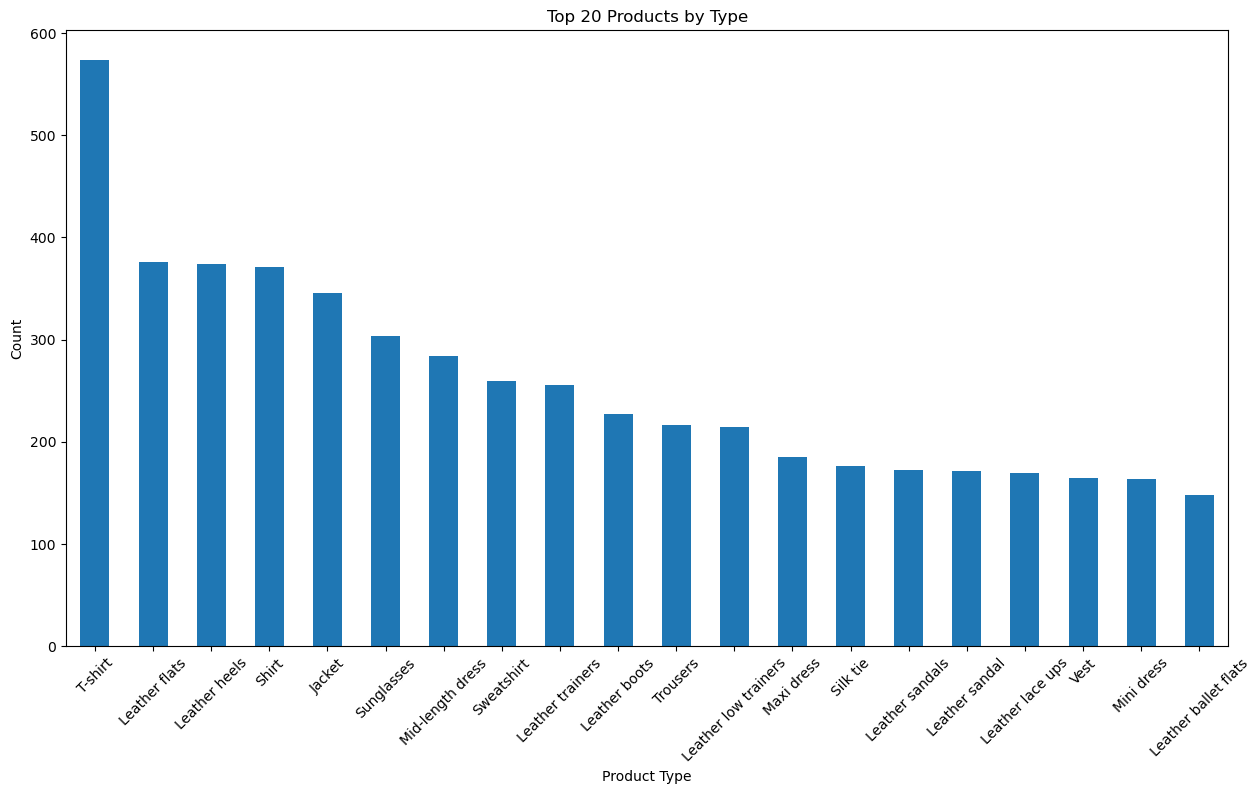

In [110]:
# Price Distribution by Product Type

category_counts = vestiaire_df['product_type'].value_counts()

top_catergory_counts= category_counts.head(20)

plt.figure(figsize=(15, 8))
top_catergory_counts.plot(kind='bar')
plt.title('Top 20 Products by Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Notes
#5150 of 13736 count of products 37.5% of data

#FINDINGS
# The findings show that T-shirts are by far the best selling products which is mostly considered a Allseason item and majority where made of cotton based on other charts findings.


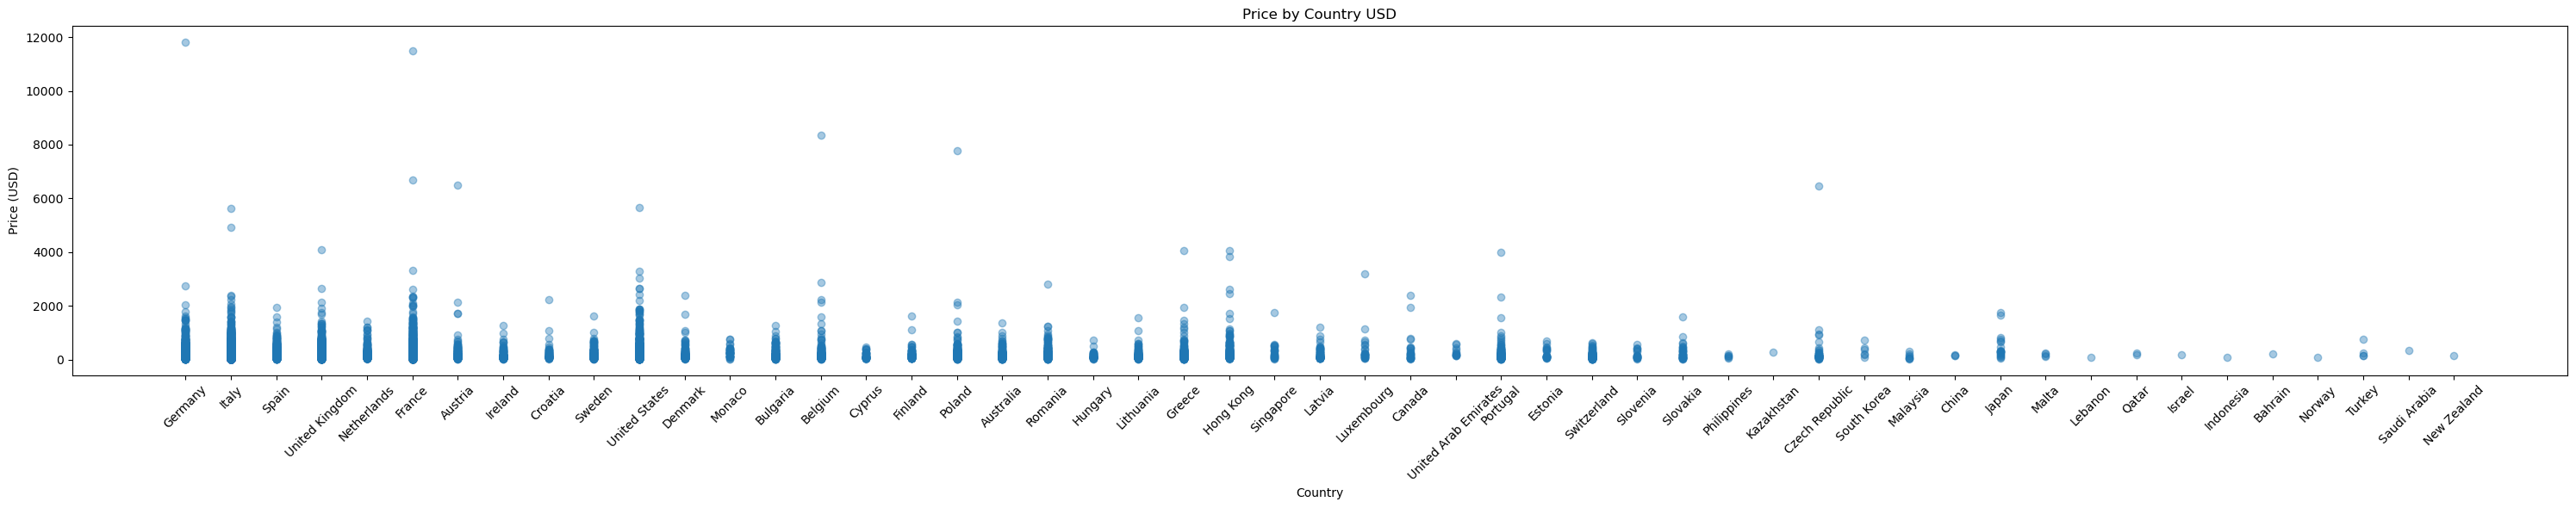

In [112]:
# Replace 'sales_data.csv' with your actual file path
vestiaire_df = pd.read_csv('C:/Users\sheve/Project-1/datasets/vestiaire_smaller.csv')

# Ensure 'price_usd' column is numeric (convert if necessary)
vestiaire_df['price_usd'] = pd.to_numeric(vestiaire_df['price_usd'], errors='coerce')

# Drop rows with missing values (if any)
vestiaire_df = vestiaire_df.dropna(subset=['price_usd', 'seller_country'])

plt.figure(figsize=(30, 6))  # Set the figure size (width, height)

# Scatter plot
plt.scatter(vestiaire_df['seller_country'], vestiaire_df['price_usd'], alpha=0.4)  # alpha controls transparency

# Customize labels and title
plt.title('Price by Country USD')
plt.xlabel('Country')
plt.ylabel('Price (USD)')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

#FINDINGS
# The findings show as we saw the top 5 countries that sold product were Italy, France, United Kingdom, Germany and United States from looking at the darker darker blue and more concentrated prices you can see similar results to the top 5 countries pie chart. Now this scatter plot does a better job of showing the variation  then it does correlation due to how much data is seen. This shows where certain countries could have big spikes in sold prices as compared to those with fewer sales.  